In [2]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

img0 = cv.imread("./data/Well B1_01/2020_02_21_19_01_45_57.tif")
img1 = cv.imread("./data/Well B1_01/2020_02_21_19_03_42_77.tif")

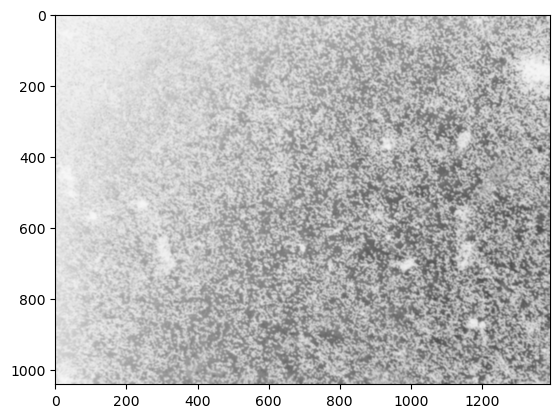

In [3]:
plt.imshow(cv.blur(255 - img0, (5, 5)))

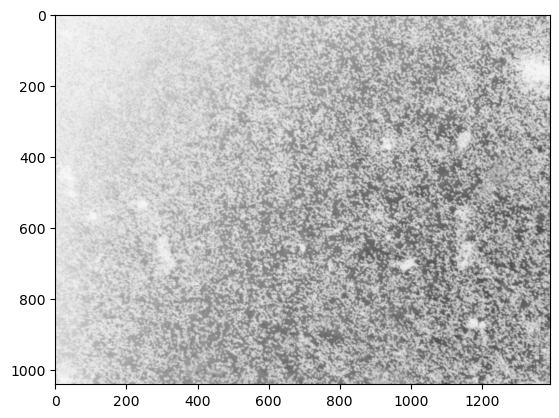

In [4]:
plt.imshow(cv.GaussianBlur(255 - img0, (5, 5), 0))

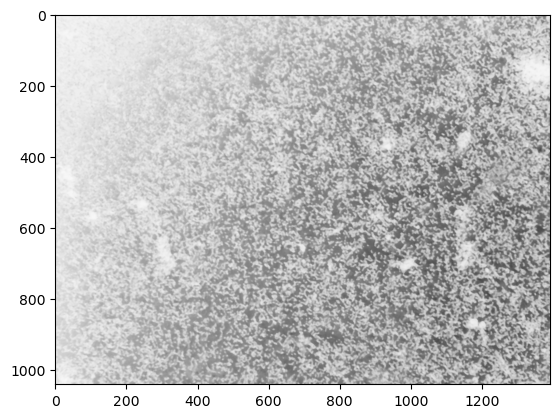

In [6]:
median = cv.medianBlur(255 - img0, 5)
plt.imshow(median)


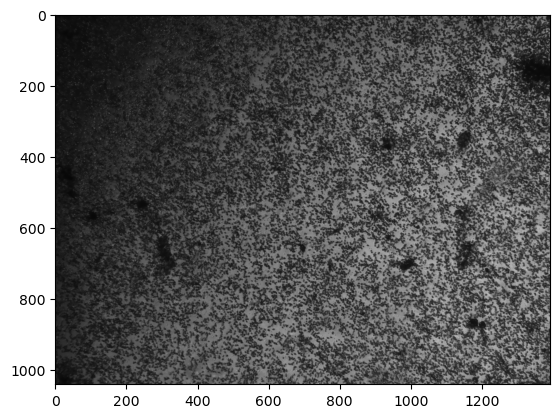

In [10]:
plt.imshow(cv.bilateralFilter(img0, 10, 10 * 2, 10 / 2))

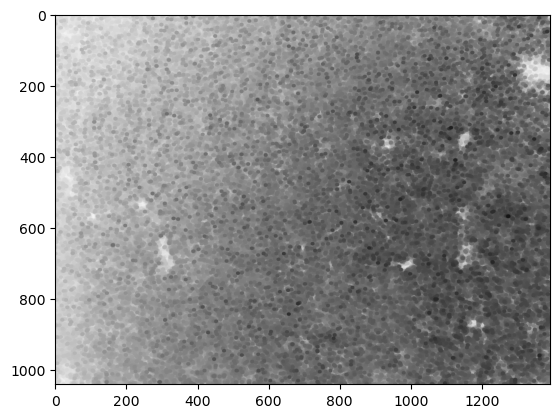

In [23]:
erosion_size = 5
element = cv.getStructuringElement(cv.MORPH_ELLIPSE, (2 * erosion_size + 1, 2 * erosion_size + 1),
                                  (erosion_size, erosion_size))
eroded = cv.erode(255 - img0, element)
plt.imshow(eroded)

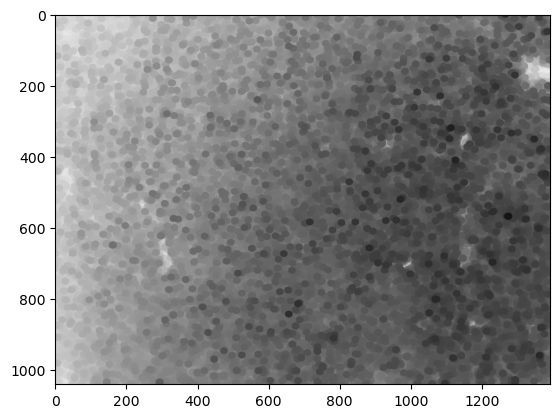

In [27]:
dilation_size = 5
element = cv.getStructuringElement(cv.MORPH_ELLIPSE, (2 * dilation_size + 1, 2 * dilation_size + 1),
                                  (dilation_size, dilation_size))
dilated = cv.erode(eroded, element)
plt.imshow(dilated)

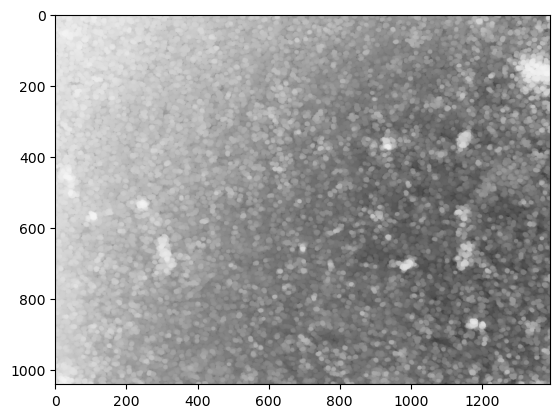

In [58]:
morph_size = 5
element = cv.getStructuringElement(cv.MORPH_ELLIPSE, (2 * morph_size + 1, 2 * morph_size + 1), (morph_size, morph_size))
opened = cv.morphologyEx(255 - img0, cv.MORPH_OPEN, element)
plt.imshow(opened)

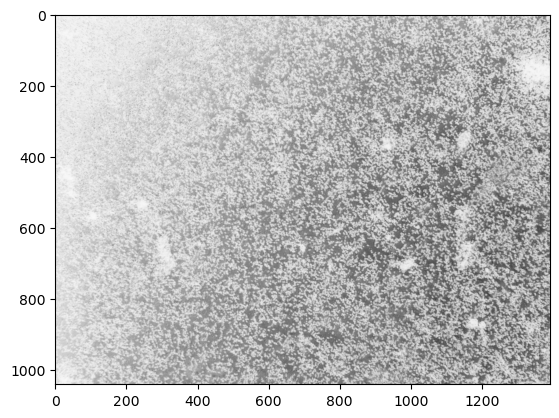

In [33]:
plt.imshow(255 - img0)

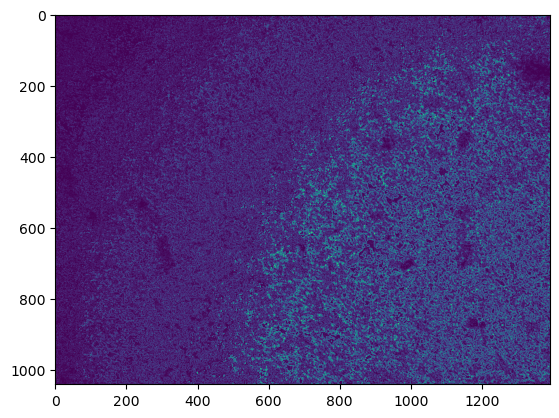

In [57]:
kernel = np.array(([0, 1, 0], 
                   [1, -1, 1],
                   [0, 1, 0]), dtype="int")
grayscale = cv.cvtColor(img0, cv.COLOR_BGR2GRAY)
plt.imshow(cv.morphologyEx(grayscale, cv.MORPH_HITMISS, kernel))

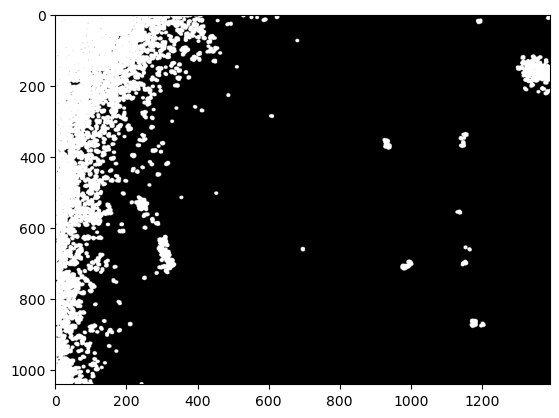

In [71]:
_, thresholded = cv.threshold(opened, 200, 255, cv.THRESH_BINARY)
plt.imshow(thresholded)